In [282]:
import pandas as pd
import numpy as np

df = pd.read_csv("KNYC.csv")

In [283]:
df

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-6-26,75,69,81,67,82,56,100,1979,1952,0.00,0.13,4.29
361,2015-6-27,65,58,71,67,82,55,101,1940,1966,1.12,0.12,2.11
362,2015-6-28,68,62,73,67,83,54,96,1995,1991,0.29,0.13,1.69
363,2015-6-29,70,63,76,67,83,52,101,1919,1934,0.00,0.12,2.57


In [284]:
en_target = df["actual_precipitation"]

In [285]:
data2 = df.drop(columns=['date', 'actual_precipitation', 'record_min_temp'])

In [286]:
data_org = df.drop(columns=['date', 'actual_precipitation', 'record_min_temp', 'record_max_temp', 'record_min_temp_year', 'record_max_temp_year', 'average_precipitation', 'record_precipitation', 'average_min_temp', 'average_max_temp'])

In [287]:
data = data_org

In [288]:
data

,actual_mean_temp,actual_min_temp,actual_max_temp
0,81,72,89
1,82,72,91
2,78,69,87
3,70,65,74
4,72,63,81
...,...,...,...
360,75,69,81
361,65,58,71
362,68,62,73
363,70,63,76


Data Scaling:

In [289]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [290]:
data_transformed = scalar.fit_transform(data)

In [291]:
data_transformed

array([[1.4078744 , 1.35619589, 1.40398116],
       [1.46148114, 1.35619589, 1.50696611],
       [1.2470542 , 1.19183125, 1.30099621],
       ...,
       [0.71098685, 0.80831376, 0.58010154],
       [0.81820032, 0.86310198, 0.73457897],
       [1.08623399, 1.13704304, 1.04353383]])

K_Means and Clusters:

In [292]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

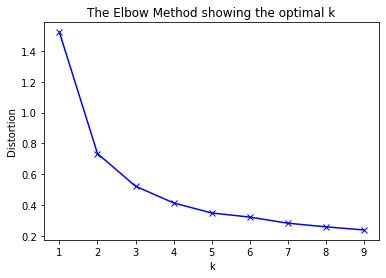

In [293]:
dis = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km.fit(data_transformed)
    dis.append(sum(np.min(distance.cdist(data_transformed, km.cluster_centers_, 'euclidean'), axis=1)) / data_transformed.shape[0])
    
plt.plot(K, dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Correlations:

In [294]:
data_corelation = data.corr()

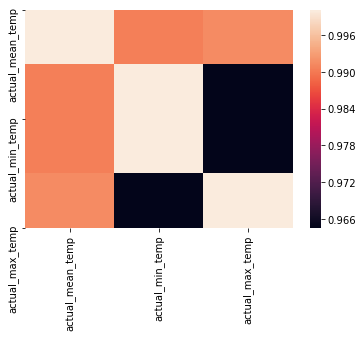

In [295]:
import seaborn as sns
sns.heatmap(data_corelation)

PCA Means:

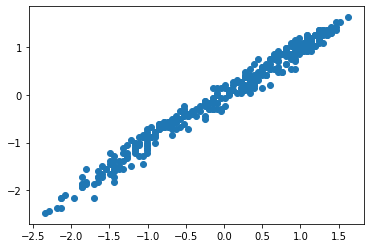

In [296]:
plt.scatter(data_transformed[:, 0], data_transformed[:, 1])

In [297]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_transformed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [298]:
principalDf

,principal component 1,principal component 2
0,-2.406505,0.033641
1,-2.496931,0.106461
2,-2.159216,0.076703
3,-1.398622,-0.241230
4,-1.605348,0.090768
...,...,...
360,-1.887939,-0.141757
361,-0.933293,-0.079181
362,-1.212113,-0.161378
363,-1.394850,-0.090902


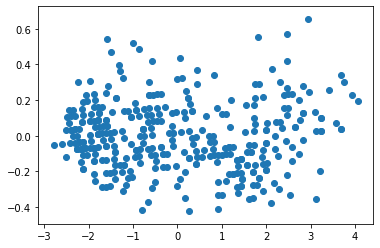

In [299]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [300]:
percip_target = pd.DataFrame()

In [301]:
en_target

0      0.00
1      0.96
2      1.78
3      0.14
4      0.00
       ... 
360    0.00
361    1.12
362    0.29
363    0.00
364    0.00
Name: actual_precipitation, Length: 365, dtype: float64

In [302]:
percip_target["percipitation"] = en_target

In [303]:
percip_target

,percipitation
0,0.00
1,0.96
2,1.78
3,0.14
4,0.00
...,...
360,0.00
361,1.12
362,0.29
363,0.00


In [304]:
for i in range(0, len(percip_target['percipitation'])):
    if percip_target['percipitation'][i] > 0:
        percip_target['percipitation'][i] = 1

In [305]:
percip_final = pd.concat([principalDf, percip_target], axis=1)

In [306]:
percip_target['percipitation'].value_counts()

0.0    241
1.0    124
Name: percipitation, dtype: int64

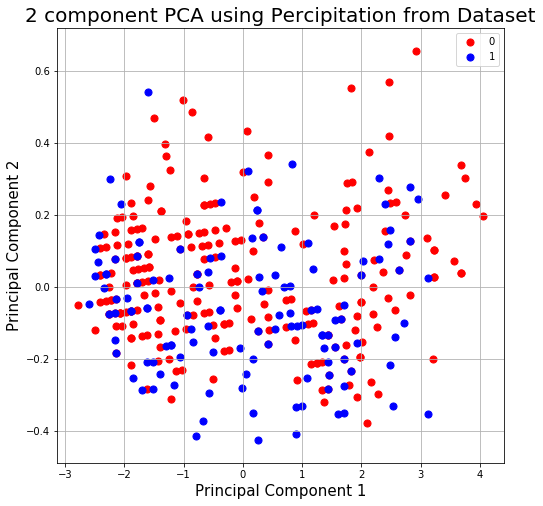

In [307]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA using Percipitation from Dataset', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = percip_final['percipitation'] == target
    ax.scatter(percip_final.loc[indicesToKeep, 'principal component 1']
               , percip_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [308]:
data_transformed
transformed_final = pd.DataFrame()
transformed_final['principal component 1'] = data_transformed[:, 0]
transformed_final['principal component 2'] = data_transformed[:, 1]

In [309]:
transformed_final = pd.concat([transformed_final, percip_target], axis=1)

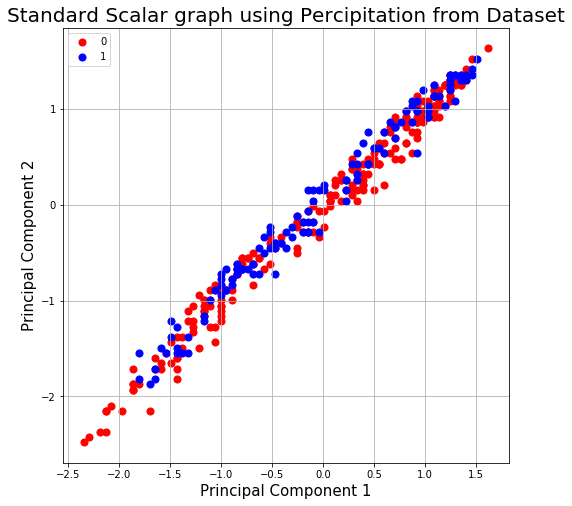

In [310]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Standard Scalar graph using Percipitation from Dataset', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = transformed_final['percipitation'] == target
    ax.scatter(transformed_final.loc[indicesToKeep, 'principal component 1']
               , transformed_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Linear Regression using PCA

In [311]:
from sklearn.model_selection import train_test_split
import numpy as np

temp = pd.DataFrame()
temp['precipitation'] = en_target

X = np.array(data["actual_mean_temp"])
y = np.array(temp['precipitation'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [313]:
percip_reg = LinearRegression()

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


percip_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [314]:
X_test = np.array(X_test).reshape(-1, 1)
testvals = percip_reg.predict(X_test)

In [315]:
for i in range(0, len(testvals)):
    print(testvals[i][0], end=" = ")
    print(y_test[i])

0.12744714408900892 = 0.69
0.13353743650692634 = 0.02
0.1288005424041017 = 0.0
0.12631931215976497 = 0.02
0.12947724156164808 = 0.0
0.1256426130022186 = 0.0
0.12744714408900892 = 0.0
0.1283494096324041 = 0.0
0.13737206506635583 = 0.0
0.1256426130022186 = 0.04
0.12992837433334564 = 0.0
0.13737206506635583 = 0.0
0.1353419675937167 = 0.0
0.13060507349089204 = 0.0
0.1315073390342872 = 0.0
0.13827433060975097 = 0.36
0.13060507349089204 = 0.2
0.13083063987674082 = 0.0
0.13646979952296065 = 0.02
0.13601866675126306 = 0.0
0.1353419675937167 = 0.0
0.13669536590880943 = 0.0
0.1278982768607065 = 0.0
0.13218403819183358 = 1.37
0.12947724156164808 = 0.0
0.13443970205032152 = 0.0
0.12744714408900892 = 0.0
0.12699601131731134 = 0.0
0.131732905420136 = 1.51
0.1405299944682389 = 0.0
0.13376300289277512 = 0.0
0.1315073390342872 = 0.33
0.12699601131731134 = 0.0
0.12699601131731134 = 0.0
0.12767271047485773 = 0.0
0.12699601131731134 = 0.0
0.12744714408900892 = 0.0
0.1319584718059848 = 0.0
0.13579310036541

In [316]:
print(percip_reg.score(X_test, y_test))

-0.005483053485619616


In [317]:
from sklearn.model_selection import train_test_split
import numpy as np

temp = pd.DataFrame()
temp['precipitation'] = en_target

X = np.array(principalDf['principal component 1'])
y = np.array(temp['precipitation'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [318]:
percip_reg = LinearRegression()

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


percip_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [319]:
X_test = np.array(X_test).reshape(-1, 1)
testvals = percip_reg.predict(X_test)

In [320]:
for i in range(0, len(testvals)):
    print(testvals[i][0], end=" = ")
    print(y_test[i])

0.12747677865908857 = 0.69
0.13355612510855364 = 0.02
0.12881296288015753 = 0.0
0.1263843783898422 = 0.02
0.12949009209711104 = 0.0
0.12579635939359107 = 0.0
0.1274858157655076 = 0.0
0.12840221038107422 = 0.0
0.1373028196070998 = 0.0
0.1257298419389363 = 0.04
0.13001254758294437 = 0.0
0.1372227464928165 = 0.0
0.13524106292726065 = 0.0
0.13059604802598598 = 0.0
0.1314808127690859 = 0.0
0.13809847412949738 = 0.36
0.13065804692743122 = 0.2
0.1308036835521324 = 0.0
0.13641353631079034 = 0.02
0.13598470959886896 = 0.0
0.13523202582084162 = 0.0
0.13665280170940344 = 0.0
0.12801730835775996 = 0.0
0.1322018666746466 = 1.37
0.12951268486315867 = 0.0
0.13441377853239644 = 0.0
0.12749485287192666 = 0.0
0.12706150760679574 = 0.0
0.1316794111888133 = 1.51
0.14039045910153056 = 0.0
0.13374116786865245 = 0.0
0.13146273855624782 = 0.33
0.12711898795503146 = 0.0
0.1271280250614505 = 0.0
0.12771604405770165 = 0.0
0.1270569890535862 = 0.0
0.12756588887979095 = 0.0
0.13199423114850017 = 0.0
0.135749962753

In [321]:
print(percip_reg.score(X_test, y_test))

-0.005502932594477761


Logistical Regression 

In [322]:
data

,actual_mean_temp,actual_min_temp,actual_max_temp
0,81,72,89
1,82,72,91
2,78,69,87
3,70,65,74
4,72,63,81
...,...,...,...
360,75,69,81
361,65,58,71
362,68,62,73
363,70,63,76


In [323]:
en_target

0      0.00
1      0.96
2      1.78
3      0.14
4      0.00
       ... 
360    0.00
361    1.12
362    0.29
363    0.00
364    0.00
Name: actual_precipitation, Length: 365, dtype: float64

In [324]:
feature_cols = ['actual_mean_temp', 'actual_min_temp', 'actual_max_temp']

# X is a matrix, access the features we want in feature_cols
X = data[feature_cols]

ytemp = pd.DataFrame()
ytemp['percipitation'] = en_target

for i in range(0, len(ytemp['percipitation'])):
    if ytemp['percipitation'][i] > 0:
        ytemp['percipitation'][i] = 1

# y is a vector, hence we use dot to access 'label'
y = ytemp['percipitation']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0.0    63
1.0    29
Name: percipitation, dtype: int64

In [325]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:
y_pred = logreg.predict(X_test)

print(y_pred)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [327]:
print(y_test.values.T)

[1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]


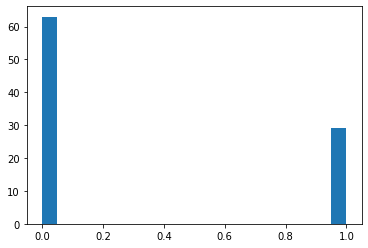

0.0    63
1.0    29
Name: percipitation, dtype: int64

In [328]:

plt.hist(y_test, bins=20)
plt.show()


y_test_pd_series = pd.Series(y_test)
y_test_pd_series.value_counts()

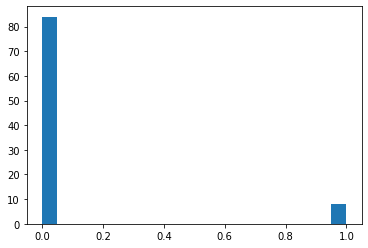

0.0    84
1.0     8
dtype: int64

In [329]:
plt.hist(y_pred, bins=20)
plt.show()


y_test_pd_series = pd.Series(y_pred)
y_test_pd_series.value_counts()

In [330]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[59  4]
 [25  4]]


In [331]:
total = 0

for y in confusion:
    for i in y:
        total += i


print(total)

92


In [332]:
accuracy = (confusion[0][0] + confusion[1][1]) / total
print(accuracy)

0.6847826086956522


In [333]:
misaccuracy = (confusion[0][1] + confusion[1][0]) / total
print(misaccuracy)

0.31521739130434784


In [334]:
precision = confusion[1][1] / (confusion[0][1] + confusion[1][1])
print(precision)

0.5


In [335]:
recall = confusion[1][1] / (confusion[1][0] + confusion[1][1])
print(recall)

0.13793103448275862


In [336]:
f1_score = 2 * precision * recall / (precision + recall)
print(f1_score)

0.2162162162162162
